## Load Data

In [1]:
# Data Handling and Analytics

import numpy as np
import pandas as pd

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Model Selection and Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


## Import Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#  'TotalCharges' column is supposed to be numeric but is incorrectly recognized as an object data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Check the Duplicate

In [5]:
print(df.duplicated().value_counts())

False    7043
dtype: int64


### Check the missing Values

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

### Descriptive Overview

In [9]:
round(df.describe(),2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7032.00
mean,0.16,32.37,64.76,2283.30
std,0.37,24.56,30.09,2266.77
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,401.45
50%,0.00,29.00,70.35,1397.48
75%,0.00,55.00,89.85,3794.74
max,1.00,72.00,118.75,8684.80


In [10]:
df.groupby('Churn').agg('mean')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2555.344141
Yes,0.254682,17.979133,74.441332,1531.796094


## Target Value 

In [16]:
# Count the oocurance of unique values in the 'Churn' Column

churn_counts =  df.Churn.value_counts(normalize=True)
churn_counts

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [25]:
# Calculate the percentage of 'Yes' and 'No' label

total_count = churn_counts.sum()

percentage_yes = (churn_counts['Yes']/ total_count) * 100
percentage_no = (churn_counts['No']/ total_count) *100

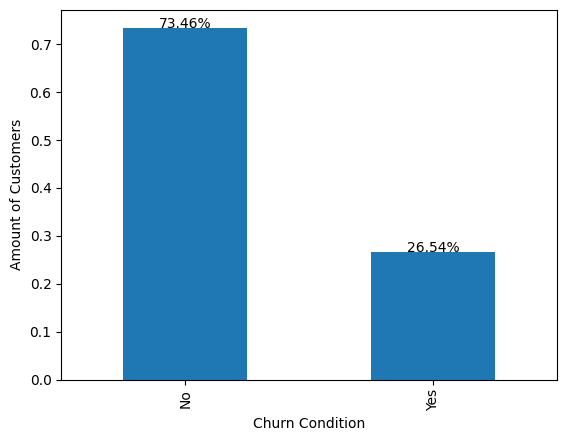

In [27]:
# Plot the target value
ax = churn_counts.plot(kind='bar')

# Annotate the bars with percentages
for i, count in enumerate(churn_counts):
    percentage = percentage_yes if i == 1 else percentage_no
    ax.annotate(f'{percentage:.2f}%', xy=(i, count), ha='center')
    
    
plt.xlabel("Churn Condition")
plt.ylabel("Amount of Customers")
plt.show()

**Observation:**

- Our dataset exhibits a significant class imbalance, with the minority class accounting for 26.54% of the dataset.


# EDA on each Feature

**Obsevation**

- The dataset exhibits a significant class imbalance, with a larger amount of data representing non-churners. 

#### 1. How does the length of a customer's tenure with the company influence their likelihood of churning?

- Tenure(How many months a person has been a client of company)

In [28]:
grouped_data = df.groupby(['tenure', 'Churn']).size().reset_index(name='count')
grouped_data[20:30]

,tenure,Churn,count
20,10,Yes,45
21,11,No,68
22,11,Yes,31
23,12,No,79
24,12,Yes,38
25,13,No,71
26,13,Yes,38
27,14,No,52
28,14,Yes,24
29,15,No,62


In [29]:
grouped_data = df.groupby(['tenure', 'Churn']).size().reset_index(name='count')
grouped_data[20:30]

,tenure,Churn,count
20,10,Yes,45
21,11,No,68
22,11,Yes,31
23,12,No,79
24,12,Yes,38
25,13,No,71
26,13,Yes,38
27,14,No,52
28,14,Yes,24
29,15,No,62


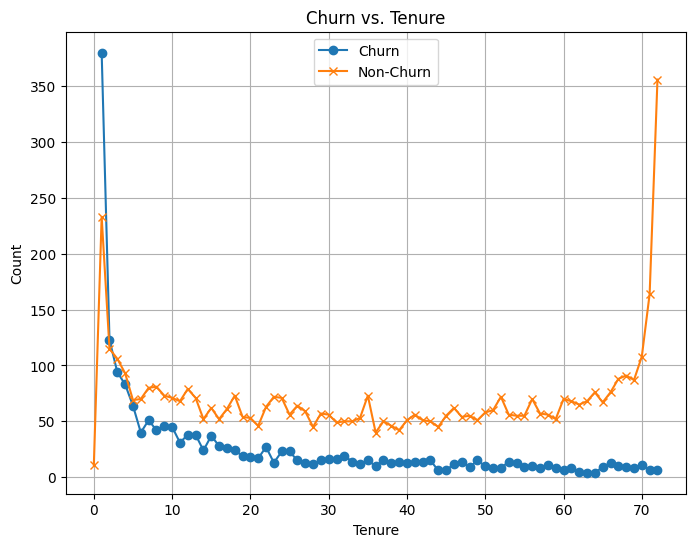

In [30]:
# Separate churn and non-churn counts
churn_data = grouped_data[grouped_data['Churn'] == 'Yes']
non_churn_data = grouped_data[grouped_data['Churn'] == 'No']

# Create a line chart for churn and non-churn counts
plt.figure(figsize=(8, 6))
plt.plot(churn_data['tenure'], churn_data['count'], label='Churn', marker='o')
plt.plot(non_churn_data['tenure'], non_churn_data['count'], label='Non-Churn', marker='x')

plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn vs. Tenure')
plt.legend()
plt.grid(True)
plt.show()

**Observation:**

- Customers with the low tenure **"0-10"** has the highest rate of churning,these range can be crucial for business decisions.



- Since, in general the **Non-Churn** line has small fluctuation and remains **relatively stable**, with longer tenure tend to stay with the company.



- The Churn line decreases or remains relatively stable as tenure increases, it suggests that **customer loyalty** increases with longer tenure.

#### 2. Is there a correlation between churn and factors such as monthly charges and total charges?

In [31]:
df[['MonthlyCharges','TotalCharges']]

,MonthlyCharges,TotalCharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65
...,...,...
7038,84.80,1990.50
7039,103.20,7362.90
7040,29.60,346.45
7041,74.40,306.60


In [32]:
df.groupby(['MonthlyCharges','TotalCharges'])['Churn'].size()

MonthlyCharges  TotalCharges
18.25           534.70          1
18.40           1057.85         1
18.55           689.00          1
18.70           383.65          1
                1005.70         1
                               ..
118.35          7804.15         1
118.60          7365.70         1
                7990.05         1
118.65          8477.60         1
118.75          8672.45         1
Name: Churn, Length: 6778, dtype: int64

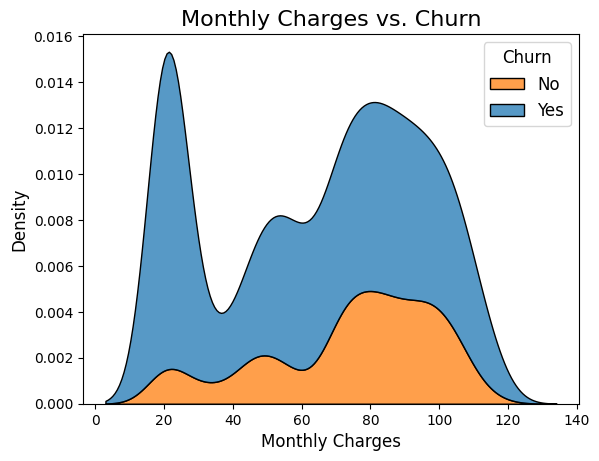

In [33]:
sns.kdeplot(data=df, x="MonthlyCharges",hue="Churn",multiple="stack")

# Customize the plot appearance
plt.title("Monthly Charges vs. Churn", fontsize=16)
plt.xlabel("Monthly Charges", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show the legend with custom labels
plt.legend(title="Churn", fontsize=12, title_fontsize=12, labels=["No", "Yes"])


**Observation:**
    
- it's noticeable that as monthly charges increase within the range of 60 to 120, the density also rises. This trend indicates a higher rate of churn as monthly charges increase.

In [34]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [35]:
print(df['TotalCharges'].dtype)

float64


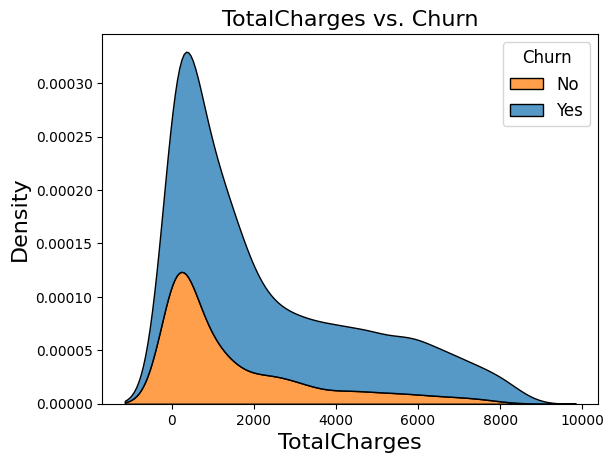

In [36]:
sns.kdeplot(data=df, x="TotalCharges",hue="Churn",multiple="stack")

# Customize the plot appearance
plt.title("TotalCharges vs. Churn", fontsize=16)
plt.xlabel("TotalCharges", fontsize=16)
plt.ylabel("Density", fontsize=16)

# Show the legend with custom labels
plt.legend(title="Churn", fontsize=12, title_fontsize=12, labels=["No", "Yes"])

- TotalCharges - the total amount that the client paid for the services for the entire time

**Observation**

- High churn rates are associated with lower total charges, with the highest churning occurring in the 0-2000 total charges range.

#### 3. What is the connection between gender, partner status, and churn?

In [37]:
df.gender.value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

In [38]:
# Create the DataFrame
df_grouped = df.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='Count')
df_grouped.head()

,gender,Partner,Dependents,Churn,Count
0,Female,No,No,No,1068
1,Female,No,No,Yes,587
2,Female,No,Yes,No,112
3,Female,No,Yes,Yes,33
4,Female,Yes,No,No,618


In [70]:
# Create the DataFrame
df_grouped = df.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name='Count')

# Create a subplot with two subplots (one for Dependents and one for Partner)
fig = px.bar(df_grouped, x='Count', y='Churn', color='Dependents', facet_col='Partner',
             labels={'Count': 'Count', 'Churn': 'Churn'}, title='Churn by Gender, Partner, and Dependents')

# Update subplot titles and labels
fig.update_xaxes(title_text='Count')
fig.update_yaxes(title_text='Churn')
fig.show()

**Observation**:
    
- Regardless of gender, individuals who lack a partner or dependents are at a higher risk of churning.

#### 4. Does the availability of technical support play a role in influencing customer churn? and does the duration of being customer 

#### i.e., "tenure feature" can say something regarding the churning?

In [40]:
df.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

- Create two dataframe for TechSupport categories 

In [41]:
Receive_techSup = df[df['TechSupport'] == 'Yes']
Receive_techSup.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes


In [42]:
NotReceive_techSup = df[df['TechSupport'] == 'No']
NotReceive_techSup.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


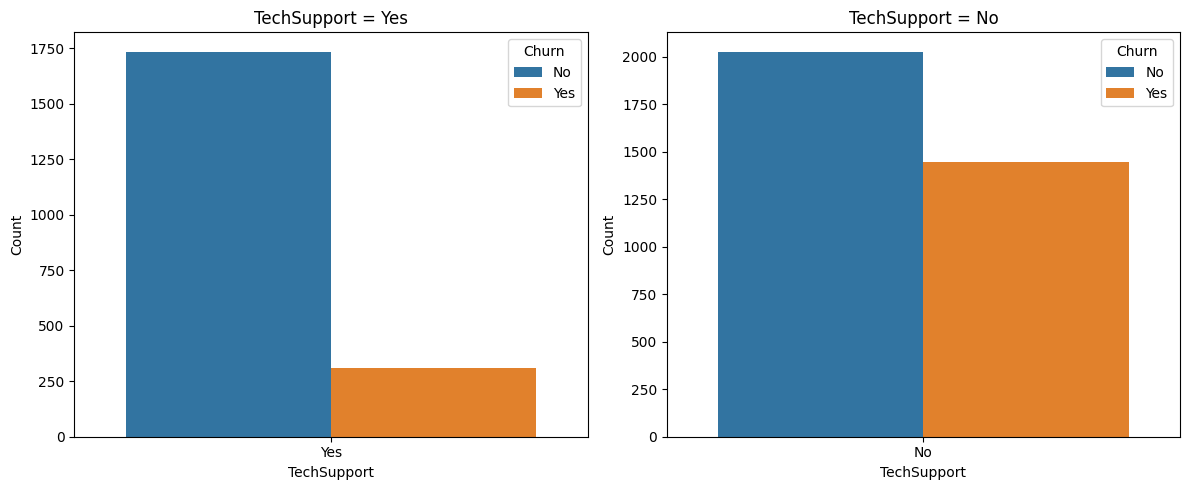

In [43]:
# Create subplots to compare the distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the distribution of 'TechSupport' for 'Yes' category
sns.countplot(data=Receive_techSup, x='TechSupport', hue='Churn', ax=axes[0])
axes[0].set_title('TechSupport = Yes')
axes[0].set_xlabel('TechSupport')
axes[0].set_ylabel('Count')  

# Plot the distribution of 'TechSupport' for 'No' category
sns.countplot(data=NotReceive_techSup, x='TechSupport', hue='Churn', ax=axes[1])
axes[1].set_title('TechSupport = No')
axes[1].set_xlabel('TechSupport')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

**Observation:**

- Customers who do not receive tech support are more likely to churn.

In [44]:
# plotting histogram for customer churning who took no tech support
fig = px.histogram(NotReceive_techSup.groupby(['tenure', 'Churn']).size().reset_index(name='count'),
                   x='tenure', y='count',color='Churn', marginal='rug', color_discrete_map={"Yes":"Green", "No":"Yellow"}, 
                   title="Customers Not Receive a tech Support")

fig.show()

In [45]:
# plotting histogram for customer churning who took no tech support
fig = px.histogram(Receive_techSup.groupby(['tenure', 'Churn']).size().reset_index(name='count'),
                   x='tenure', y='count',color='Churn', marginal='rug', color_discrete_map={"Yes":"Green", "No":"Yellow"}, 
                   title="Customers Not Receive a tech Support")

fig.show()

**Observation**

- The data indicates that churn rates are highest within the first year of service, especially among customers without tech support. Conversely, longer tenure is associated with increased customer loyalty.

#### 5. Which aspect of the contract has the most significant impact on the business?

In [46]:
df.Contract.value_counts(normalize =True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [47]:
Contract_condition = df.groupby(['Churn','Contract']).size().reset_index(name='count')
Contract_condition

,Churn,Contract,count
0,No,Month-to-month,2220
1,No,One year,1307
2,No,Two year,1647
3,Yes,Month-to-month,1655
4,Yes,One year,166
5,Yes,Two year,48


<Axes: xlabel='Contract', ylabel='Count'>

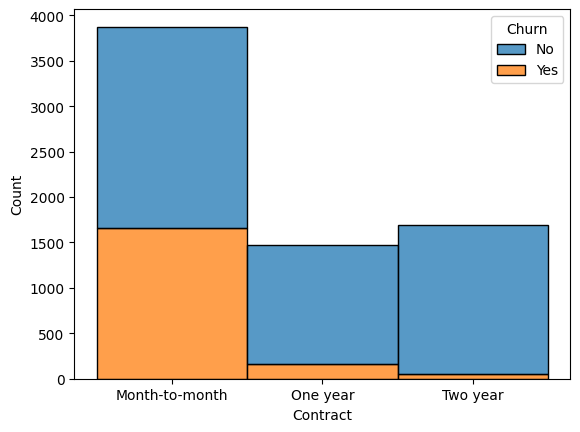

In [48]:
sns.histplot(data=df, x='Contract', hue='Churn', multiple='stack')

**Observation:**
    
- It is evident that customers with month-to-month contracts have the highest churn rates.

#### 6. How does the quality of service differ for customers who have opted for streaming services?

In [49]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [50]:
Streming = df.groupby (['Churn','StreamingTV']).size().reset_index(name='count')
Streming

,Churn,StreamingTV,count
0,No,No,1868
1,No,No internet service,1413
2,No,Yes,1893
3,Yes,No,942
4,Yes,No internet service,113
5,Yes,Yes,814


Text(0, 0.5, 'Count')

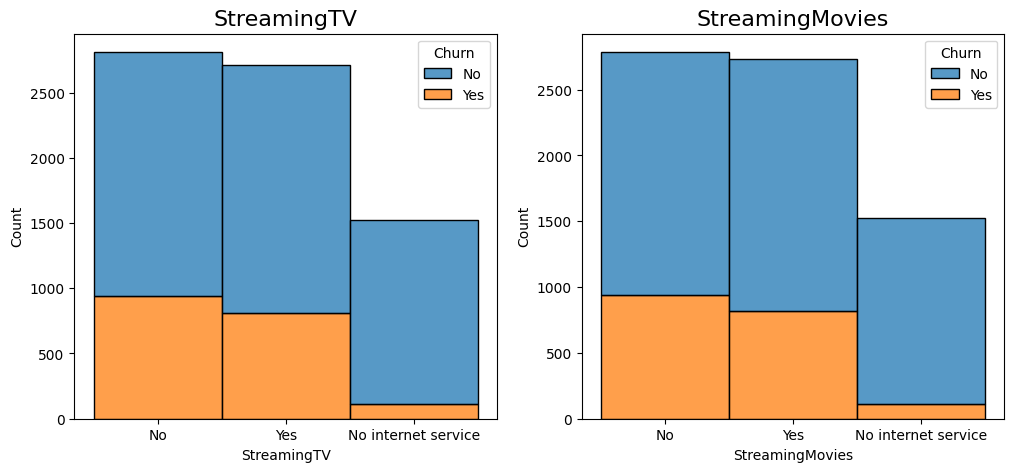

In [51]:
fig, axes = plt.subplots(1,2,figsize = (12,5))

# Plot the distribution of 'StreamingTV' 
sns.histplot(data=df, x='StreamingTV', hue='Churn', multiple='stack',ax=axes[0])
axes[0].set_title('StreamingTV',fontsize=16)
axes[0].set_xlabel('StreamingTV')
axes[0].set_ylabel('Count')

# Plot the distribution of 'StreamingMovies'
sns.histplot(data=df, x='StreamingMovies', hue='Churn', multiple='stack',ax=axes[1])
axes[1].set_title('StreamingMovies',fontsize=16)
axes[1].set_xlabel('StreamingMovies')
axes[1].set_ylabel('Count')

**Observation**:
    
- Churn rates are similar for both the 'Yes' and 'No' groups in terms of whether customers are connected to StreamingTV and StreamingMovies.

#### 7. Given that the dataset pertains to the telecom industry, what insights can we uncover regarding phone and internet services?

In [52]:
df.InternetService.value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

In [53]:
df.PhoneService.value_counts(normalize=True)

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64

In [54]:
# Group the data by "InternetService", "phoneService" and "Churn" and count the number of records
service_counts = df.groupby(['InternetService','PhoneService', 'Churn']).size().reset_index(name='Count')
service_counts

,InternetService,PhoneService,Churn,Count
0,DSL,No,No,512
1,DSL,No,Yes,170
2,DSL,Yes,No,1450
3,DSL,Yes,Yes,289
4,Fiber optic,Yes,No,1799
5,Fiber optic,Yes,Yes,1297
6,No,Yes,No,1413
7,No,Yes,Yes,113


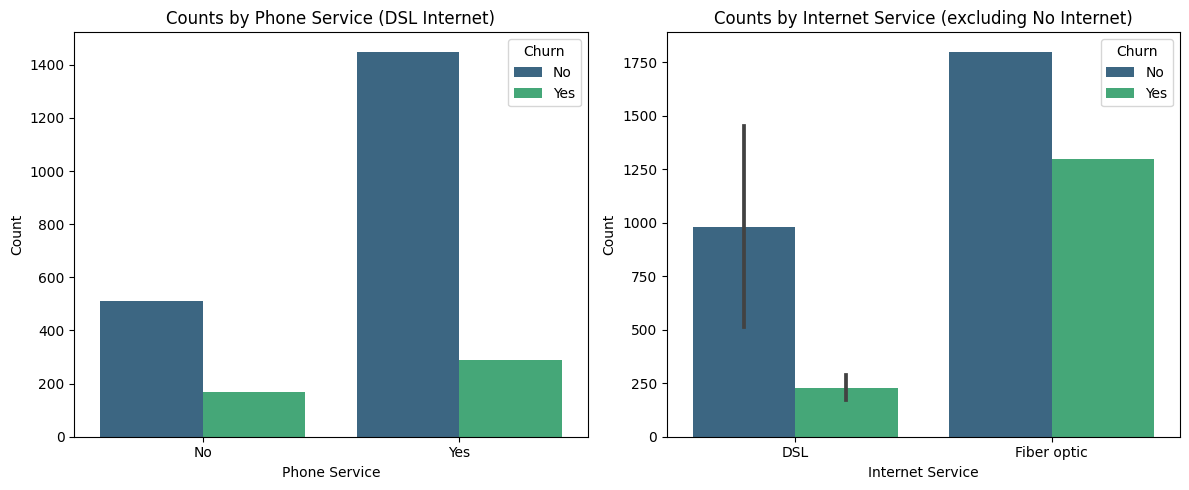

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 5))

# Create two subplots
plt.subplot(121)  # 1 row, 2 columns, the first plot for Phone Service
sns.barplot(data=service_counts[service_counts['InternetService'] == 'DSL'], x='PhoneService', y='Count', hue='Churn', palette='viridis')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.title('Counts by Phone Service (DSL Internet)')

plt.subplot(122)  # 1 row, 2 columns, the second plot for Internet Service
sns.barplot(data=service_counts[service_counts['InternetService'] != 'No'], x='InternetService', y='Count', hue='Churn', palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Counts by Internet Service (excluding No Internet)')

plt.tight_layout()
plt.show()



**Observation**

- The plot suggests that the customers with phone service are loyal and have not churned.(the blue bar is significantly taller than green).


- For customers without phone service, the blue bar for non-churn is still higher than the green bar.This indicate that even among those wothout phone service, a significant portion has not churned, and the absentece of phone service is associated with a lower churn rate.


- In summary, the chart illustrates that customers with phone service, as well as some customers without phone service, are less likely to churn, This suggests that both groups have a relatively lower churn rate, with a particularly strong retention rate among customers with phone service.

#### 8. Does the PaymentMethod has an impact on churn?

In [56]:
df.PaymentMethod.value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

<Axes: xlabel='count', ylabel='PaymentMethod'>

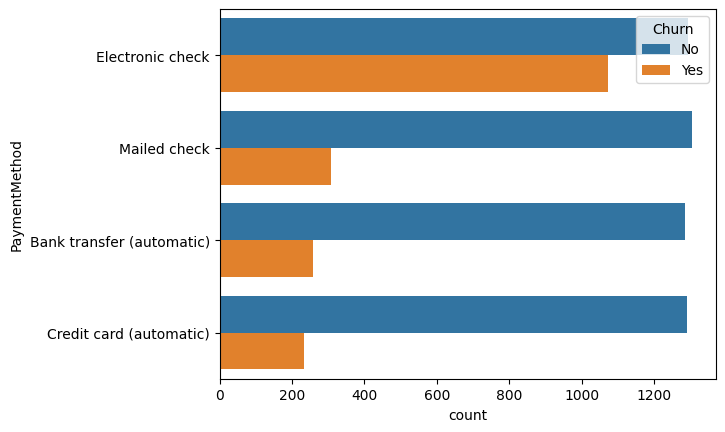

In [57]:
payment = sns.countplot(data=df, y='PaymentMethod',hue='Churn')
payment

### Seprate data into Numerical and Categorical feature

In [58]:
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
numerical_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

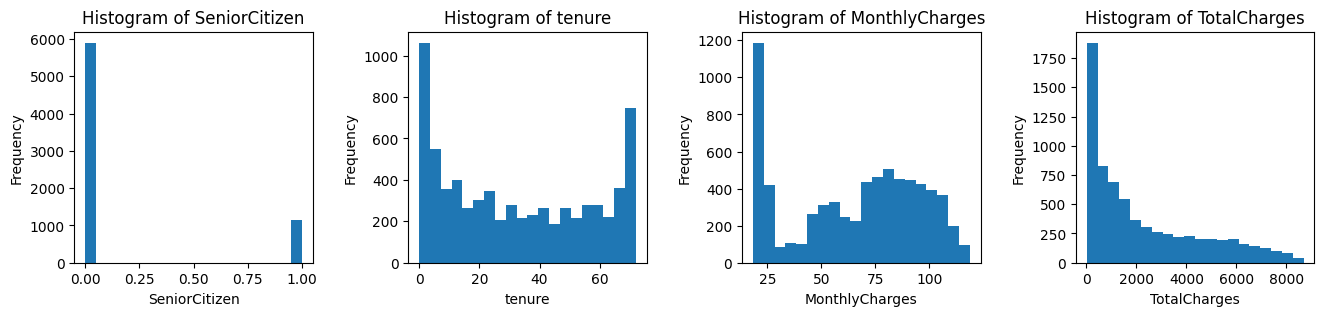

In [59]:
num_plots = len(numerical_features)

# Create a row of smaller histograms for each numerical feature
plt.figure(figsize=(16, 3))  
plt.subplots_adjust(wspace=0.4) # Horizontal space 

for i, feature in enumerate(numerical_features):
    plt.subplot(1, num_plots, i + 1)
    plt.hist(df[feature], bins=20)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.show()

**Observation**

- A lower percentage of service users falls into the senior citizen category.


- Tenure tends to be higher in the initial years of service.


- Higher monthly charges, particularly in the 60-120 range, are linked to increased churn rates.


- Lower total charges, especially in the 0-2000 range, are associated with higher churn rates.

In [61]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Specify the category you want to exclude
category_to_exclude = 'customerID'

# Create a new list without the excluded category
categorical_features_filtered = [feature for feature in categorical_features if feature != category_to_exclude]

print(categorical_features_filtered)


['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


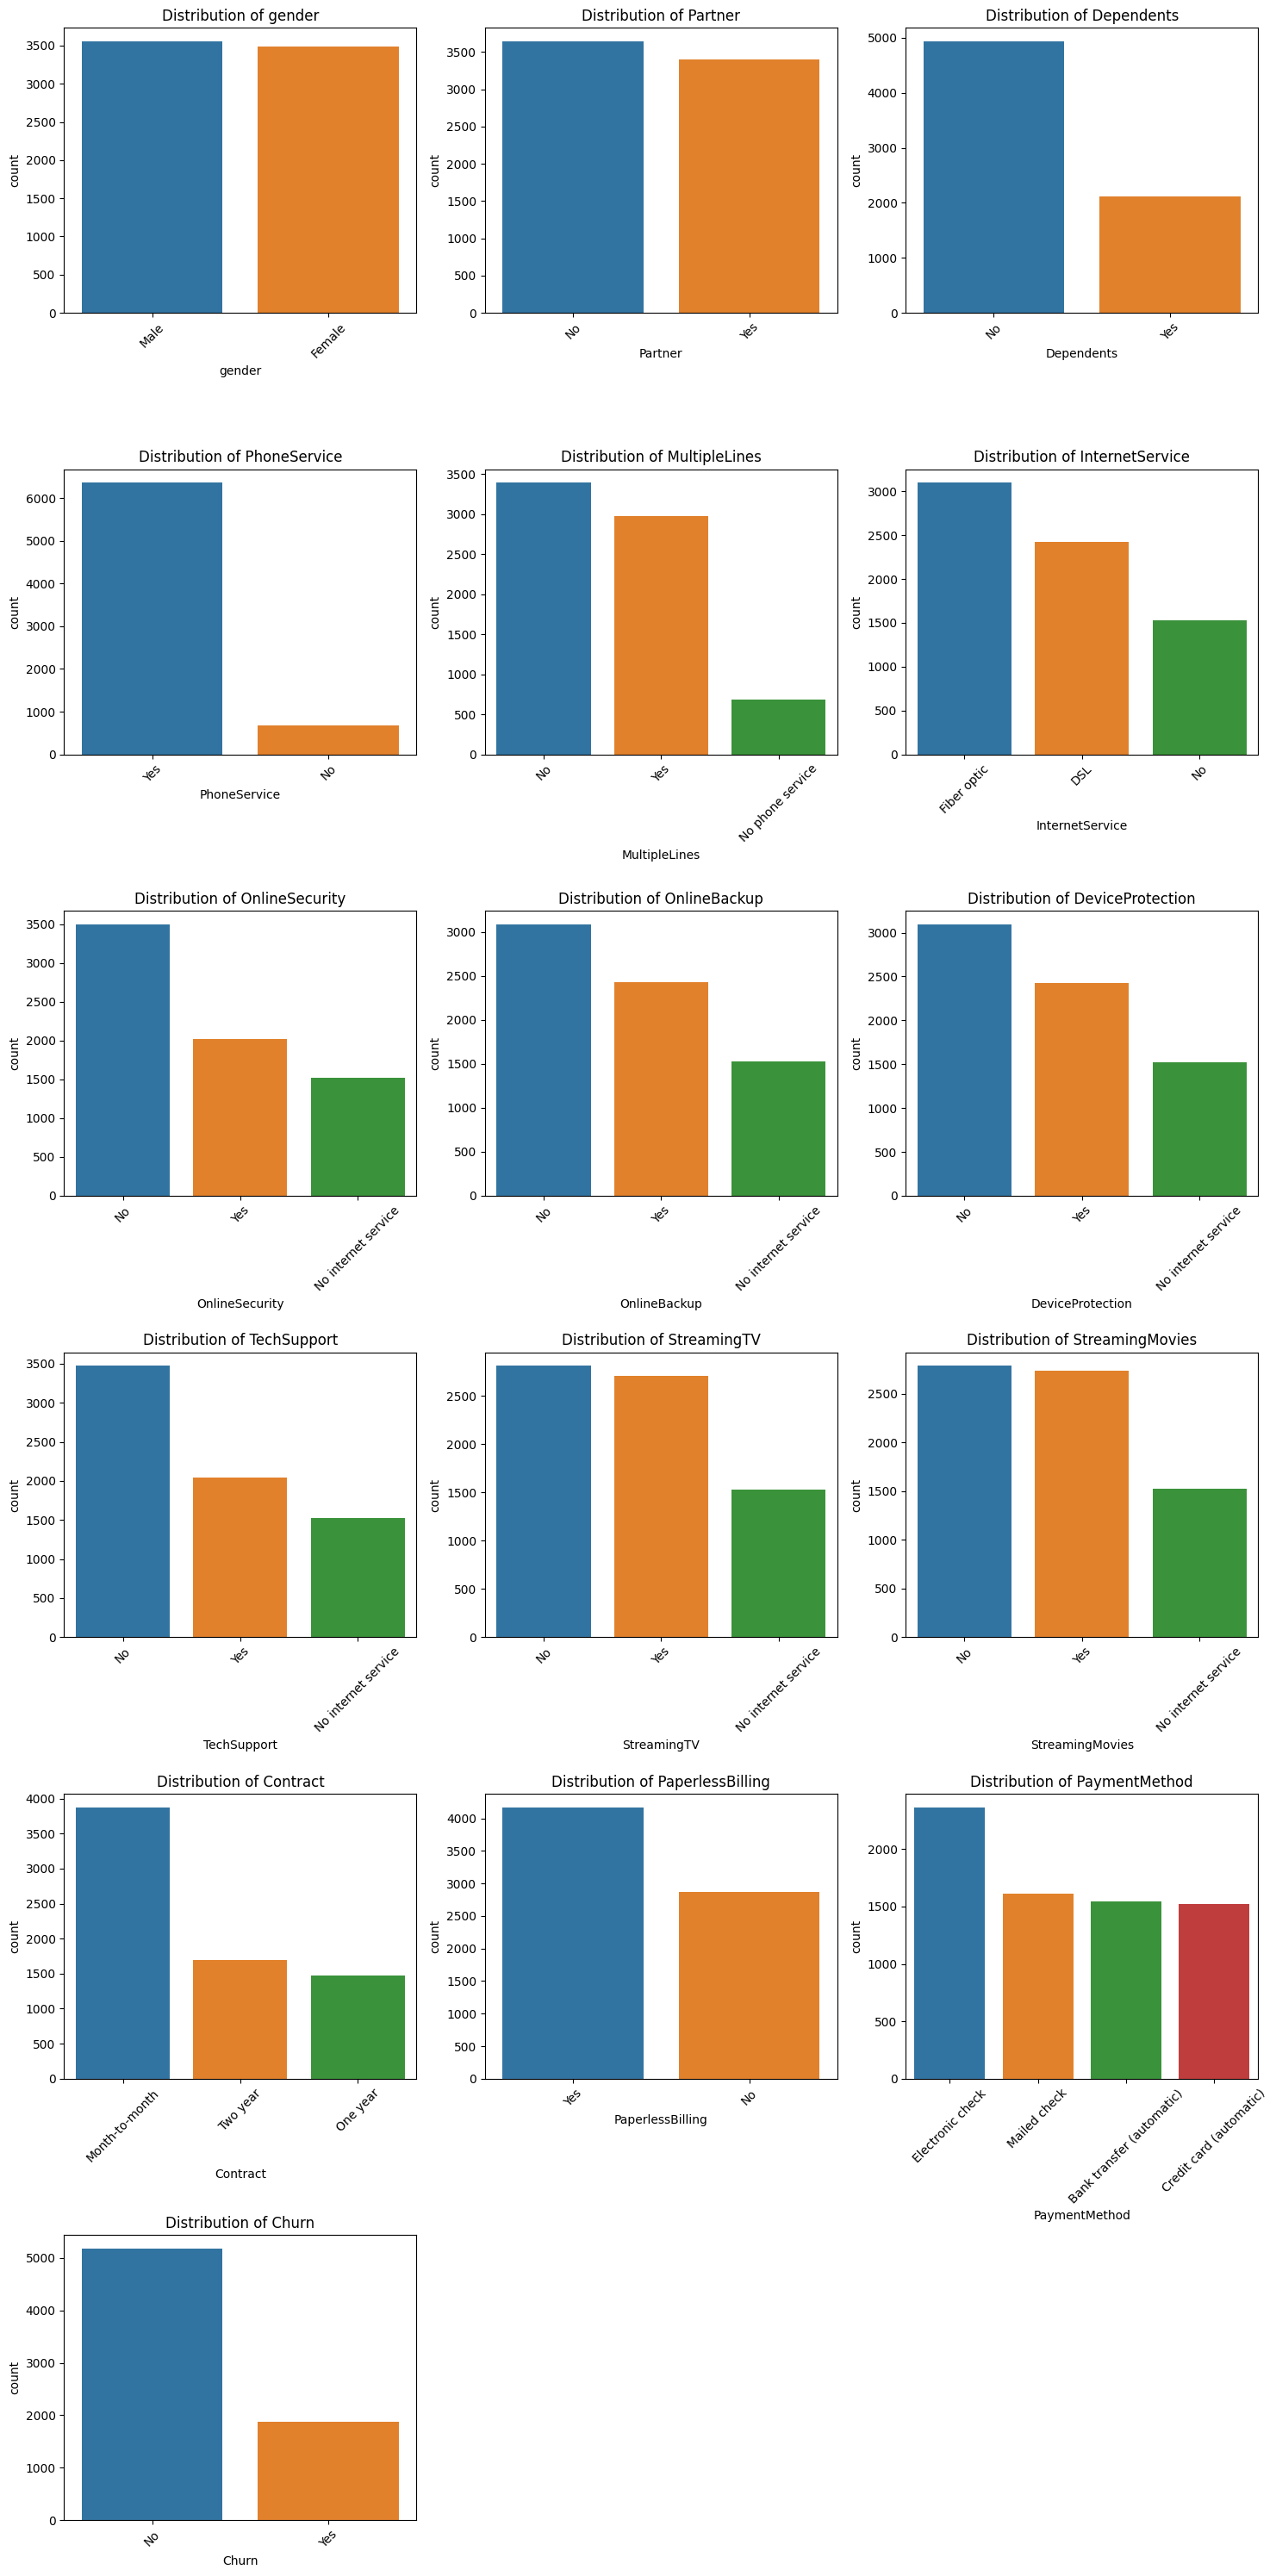

In [63]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df and a list of categorical features categorical_features_filtered

# Determine the number of rows and columns for the subplot grid
num_features = len(categorical_features_filtered)
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (num_features - 1) // num_cols + 1

# Set the overall figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Loop through each categorical feature and create a bar plot in a subplot
for i, feature in enumerate(categorical_features_filtered):
    ax = axes[i // num_cols, i % num_cols]
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for readability

# Remove any empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [69]:
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd

# Assuming you have a DataFrame df and a list of categorical features categorical_features_filtered

# Determine the number of rows and columns for the subplot grid
num_features = len(categorical_features_filtered)
num_cols = 3  # You can adjust the number of columns as needed
num_rows = (num_features - 1) // num_cols + 1

# Create a subplot grid
fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=categorical_features_filtered)

# Loop through each categorical feature and create a grouped bar plot in a subplot
for i, feature in enumerate(categorical_features_filtered):
    row = i // num_cols + 1  # Calculate the row
    col = i % num_cols + 1   # Calculate the column

    # Create a grouped bar plot for the current feature in the subplot
    counts = df.groupby([feature, "Churn"]).size().unstack().fillna(0)
    counts_normalized = counts.div(counts.sum(axis=1), axis=0)  # Normalize for better comparison
    bars = []
    for churn_value in counts_normalized.columns:
        bar = go.Bar(x=counts_normalized.index, y=counts_normalized[churn_value], name=f"Churn: {churn_value}")
        bars.append(bar)
    fig.add_traces(bars, rows=[row] * len(bars), cols=[col] * len(bars))

# Update the layout for better visualization
fig.update_layout(
    #title="Categorical Feature Distributions by Churn",
    showlegend=True,  # Show legend to distinguish Churn categories
    legend=dict(orientation="h", yanchor="bottom", y=1.02),  # Position the legend
    height=600 + (num_rows - 1) * 100,  # Adjust the height based on the number of rows
    barmode="group",  # Grouped bar mode
)

# Show the plot
fig.show()


In [ ]:
#categorical features
plt.figure(figsize=(15,60))
pos =1
for cat_feature in categorical_features:
    ax = plt.subplot(12,3,pos)
    sns.countplot(y=cat_feature, data=df ,hue='Churn',palette = 'Set2')
    plt.xlabel(cat_feature)
    plt.title(cat_feature)
    pos+=1
plt.tight_layout()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove the first element, assuming it's "Customer ID"
if categorical_features[0] == "Customer ID":
    categorical_features.pop(0)  # Remove the first element

# Create categorical plots for each categorical feature
plt.figure(figsize=(15, 60))
pos = 1
for cat_feature in categorical_features:
    ax = plt.subplot(12, 3, pos)
    sns.countplot(y=cat_feature, data=df, hue='Churn', palette='Set2')
    plt.xlabel(cat_feature)
    plt.title(cat_feature)
    pos += 1
plt.tight_layout()


# EDA Outcome:

In [ ]:
# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15, 3))

for i, feature in enumerate(numerical_features):
    df[feature].hist(ax=axes[i], bins=20, edgecolor='k')
    axes[i].set_title(feature)

plt.show()

**Summary of Observations:**
    
- The data reveals that the highest churn rate occurs within the first 0-10 years of customer tenure, suggesting that customers are less inclined to switch telecom providers as they become more familiar with their current one.



- Churning tends to increase with rising monthly charges, particularly in the 60-120 range, indicating a correlation between higher charges and increased churn.



- In contrast to monthly charges, the most significant churning occurs in the early phases, with the 0-2000 total charges bracket experiencing the highest churn rate.




- Regardless of gender, customers without partners or dependents are more likely to churn.



-  Churning is more prevalent within the first 10 years of tenure for customers with or without tech support, with a higher rate among those without tech support.



- Customers who have both Phone services (yes) and 'Fiber optic' Internet Service are more prone to churn.




- The presence of StreamingTV, whether 'Yes' or 'No,' does not significantly affect the rate of churn; it appears to be relatively consistent




- The availability of StreamingMovies (either 'Yes' or 'No') does not appear to have a substantial impact on churn.




- Customers with month-to-month contracts are the most frequent churners, highlighting the importance of contract type in predicting churn.




- Senior citizens exhibit a lower likelihood of churning compared to non-senior citizens. It's worth noting that the dataset comprises a significantly higher proportion of non-senior citizens at a 5:1 ratio.

## Data Pre-processing

In [ ]:
# drop the ID

df.drop(columns=['customerID'], inplace = True)

In [ ]:
df.TotalCharges.isnull().any()

In [ ]:
df.TotalCharges.isnull().sum()

In [ ]:
df.TotalCharges.hist()

- As the data skewed and has some outliers, it is better to use median.

In [ ]:
# Fill the missing values
median = df['TotalCharges'].median()
df['TotalCharges'].fillna(median, inplace=True)

In [ ]:
df.isnull().sum().any()

### Prepare the features and target variable

In [ ]:
# spliliting data into dependent and independent variables

X = df.drop(['Churn'],axis=1)
y = df.Churn

In [ ]:
# List of categorical columns (Senior is 0,1 but indeed is a categorical)
cat_cols = [col for col in X.columns if X[col].dtype == 'object' or (col == 'SeniorCitizen' and X[col].dtype == 'int64')]
print(cat_cols)

## Encoding

- Perform feature encoding to convert categorical features into numerical features

In [ ]:
# Encode categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') 
categorical_encoded = pd.DataFrame(encoder.fit_transform(X[cat_cols]),index=X.index)

In [ ]:
# Combine encoded categorical variables with numerical features
numerical_data = X.drop(cat_cols, axis=1)

In [ ]:
combined_data = pd.concat([categorical_encoded, numerical_data], axis=1)

In [ ]:
numerical_data = df.drop(cat_cols,axis=1)

In [ ]:
combined_data = pd.concat([categorical_encoded, numerical_data], axis=1)
combined_data.head()

### Encode the labels y

In [ ]:
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)
y_encoder

### Feature Scaling - Scale the combined data

In [ ]:
cols = combined_data.columns

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(combined_data)
combined_data_scaled = pd.DataFrame(x_scaled,columns=cols)

## Spilit the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(combined_data_scaled, y_encoder, test_size=0.20, 
                                                    shuffle=True, stratify=y_encoder, random_state=42)

#### Function to ease the Analysis

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels= None):
    
    """
    parameters:
    - y_test : Actual label(Ground truth)
    - y_pred : predicted labels
    - labels : list of class label for customizing the axis
    """
    # calculate the confusion matrix
    cm = confusion_matrix(y_true,y_pred)
    
    # create a heatmap for visualization
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,camp='Blues',fmt='d',cbar=False,xticklabels=labels,yticklabels=labels)
    
    # plot labels
    plt.xlabel('predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

## Cross validate to check which model performs better

- Stratified sampling: Using stratified to keeping the target values distibution unchanged

In [ ]:
# create a splitter object
stratified = StratifiedShuffleSplit(n_splits=5,test_size=0.2, random_state=42) 

In [ ]:
# Define the models to compare
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

# Calculate cross-validation scores for each model
for name, model in models:
    cv_score = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='accuracy', cv=stratified)
    print(f'{name} CV Score:', cv_score.mean())

**Observation:**

- In the cross-validation process, **StratifiedKFold** was used to preserve the target variable distribution in each fold.



- Based on the cross-validation scores, it is difficult to make a final decision on which model is superior since all three models (Logistic Regression, SVM, and Random Forest) perform similarly.



- Therefore, based on the cross-validation results on the training set, it appears that all three models are effective and **do not exhibit significant differences** in performance.

## Model Building

- Use binary classification algorithms for predicting the "churn" variable, which has a "Yes/No" value. In this project, we will be using three supervised models:

- Logistic regression 
- Support Vector Machine with Radial basis function kernel
- Random Forest

## Logistic Regression

In [ ]:
# Instantiate a logistic regression
log_reg= LogisticRegression()
# Train the model on training dataset
fit_model= log_reg.fit(X_train,y_train)
# predict the test
prediction = fit_model.predict(X_test)
# use the score method to evaluate the model's accuracy
accuracy = log_reg.score(X_test, y_test)

# evaluate
confusion_matrix(y_test,prediction)

## Hyperparameters Tuning (Logistic Regression)

In [ ]:
%%time

# Define the logistic regression model with class weight balancing
log_reg = LogisticRegression(class_weight='balanced')

# Define hyperparameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200]  # Corrected the format
}

# Create a stratified cross-validation object
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=stratified_cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_logreg = grid_search.best_estimator_  # best combination
best_score = grid_search.best_score_  # value from the best combination

# Evaluate the best estimator on the test data
prediction = best_logreg.predict(X_test)

# Evaluate the model
accuracy = best_logreg.score(X_test, y_test)

# Print classification report for a more detailed evaluation
report = classification_report(y_test, prediction)
print(report)


In [ ]:
# Generate and display the confusion matrix
confusion = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion)